In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_1 = "~/Desktop/trial.csv"
file_2 = "~/Desktop/mouse.csv"

In [3]:
drug_df = pd.read_csv(file_2)

In [4]:
ex_df = pd.read_csv(file_1)

In [5]:
full_df = ex_df.merge(drug_df,how='left', left_on='Mouse ID', right_on='Mouse ID')
full_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,f932,0,45.000000,0,Ketapril
2,g107,0,45.000000,0,Ketapril
3,a457,0,45.000000,0,Ketapril
4,c819,0,45.000000,0,Ketapril
...,...,...,...,...,...
1901,r944,45,41.581521,2,Capomulin
1902,u364,45,31.023923,3,Capomulin
1903,p438,45,61.433892,1,Ceftamin
1904,x773,45,58.634971,4,Placebo


In [6]:
med_list = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
df_clean = full_df[full_df['Drug'].isin(med_list)]
df_clean.set_index('')

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,f932,0,45.000000,0,Ketapril
2,g107,0,45.000000,0,Ketapril
3,a457,0,45.000000,0,Ketapril
4,c819,0,45.000000,0,Ketapril
...,...,...,...,...,...
1891,i557,45,47.685963,1,Capomulin
1896,t718,45,63.423695,4,Placebo
1901,r944,45,41.581521,2,Capomulin
1902,u364,45,31.023923,3,Capomulin


In [7]:
from mlxtend.plotting import category_scatter

[]

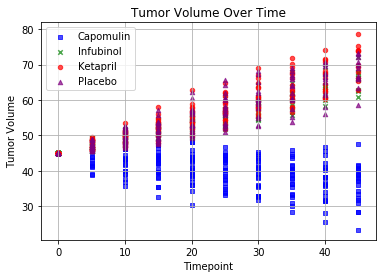

In [37]:
#A scatter plot that shows how the tumor volume changes over time for each treatment.
category_scatter(x='Timepoint', y='Tumor Volume (mm3)', label_col='Drug',
                       data=df_clean)

plt.title("Tumor Volume Over Time")
plt.ylabel('Tumor Volume')
plt.xlabel("Timepoint")
plt.grid()
plt.savefig("tumor_vol.png")
plt.plot()
#While this graph is really cool, I decided that an average per timepoint would be a better representation. Read on for that.

In [193]:
ms_data = df_clean[['Timepoint', 'Metastatic Sites', 'Drug']]
ms_data
ms_data.groupby(['Timepoint']).mean()

,Metastatic Sites
Timepoint,
0,0.000000
5,0.278351
10,0.597826
15,0.821429
20,1.086420
25,1.381579
30,1.694444
35,1.876923
40,2.224138


In [192]:
clean = ms_data.set_index('Drug')
clean
clean.groupby(['Timepoint']).mean()

,Metastatic Sites
Timepoint,
0,0.000000
5,0.278351
10,0.597826
15,0.821429
20,1.086420
25,1.381579
30,1.694444
35,1.876923
40,2.224138


In [191]:
#Try to make a dataframe for each drug, then groupby day to find the mean for each day
v_df = df_clean["Drug"] == 'Capomulin'
c_df = df_clean[v_df]


In [190]:
c_stats = c_df.groupby(['Timepoint']).mean()


In [189]:
v2_df = df_clean["Drug"] == 'Ketapril'
k_df = df_clean[v2_df]


In [188]:
k_stats = k_df.groupby(['Timepoint']).mean()


In [187]:
v3_df = df_clean["Drug"] == 'Placebo'
p_df = df_clean[v3_df]


In [186]:
p_stats = p_df.groupby(['Timepoint']).mean()


In [185]:
v4_df = df_clean["Drug"] == 'Infubinol'
i_df = df_clean[v4_df]


In [184]:
i_stats = i_df.groupby(['Timepoint']).mean()


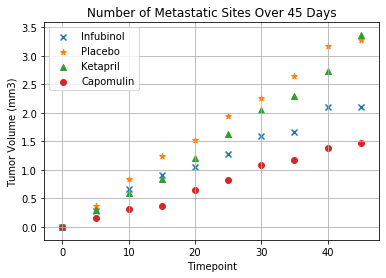

In [194]:
#A scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
i_chart, = plt.scatter(i_stats.index, i_stats['Metastatic Sites'], marker='x', label = 'Infubinol'),
p_chart, = plt.scatter(p_stats.index, p_stats['Metastatic Sites'], marker='*', label = 'Placebo'),
k_chart, = plt.scatter(k_stats.index, k_stats['Metastatic Sites'], marker='^', label = 'Ketapril'),
c_chart =  plt.scatter(c_stats.index, c_stats['Metastatic Sites'], marker='o', label = 'Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Number of Metastatic Sites Over 45 Days')
plt.legend(handles=[i_chart, p_chart, k_chart, c_chart], loc="best")
plt.grid()
plt.show()


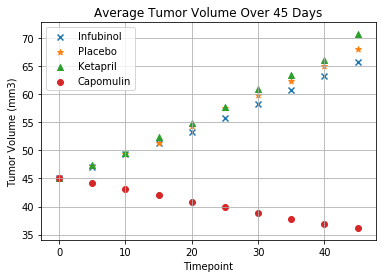

In [108]:
#A scatter plot that shows how the tumor volume changes over time for each treatment.
i_chart, = plt.scatter(i_stats.index, i_stats['Tumor Volume (mm3)'], marker='x', label = 'Infubinol'),
p_chart, = plt.scatter(p_stats.index, p_stats['Tumor Volume (mm3)'], marker='*', label = 'Placebo'),
k_chart, = plt.scatter(k_stats.index, k_stats['Tumor Volume (mm3)'], marker='^', label = 'Ketapril'),
c_chart =  plt.scatter(c_stats.index, c_stats['Tumor Volume (mm3)'], marker='o', label = 'Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume Over 45 Days')
plt.legend(handles=[i_chart, p_chart, k_chart, c_chart], loc="best")
plt.grid()
plt.show()
#Pretty easy to see how effective Capomulin is when it comes to tumor volume. This is matched, perhaps not to 
#this extent, the trend of the metastatic data we observed in the earlier graph. As for the other treatments, 
#we see almost no difference in terms of average tumor volume. We do see that Infubinol has a significant leg 
#up in terms of number of metastatic sites, though.

In [183]:
c_mice = c_df.groupby(['Timepoint']).nunique()


In [182]:
i_mice = i_df.groupby(['Timepoint']).nunique()


In [181]:
k_mice = k_df.groupby(['Timepoint']).nunique()


In [180]:
p_mice = p_df.groupby(['Timepoint']).nunique()


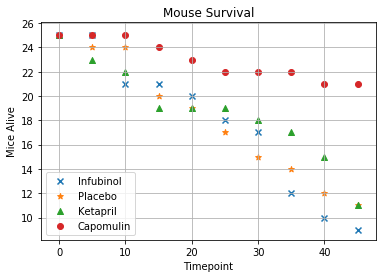

In [107]:
#A scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
i_mouse_chart, = plt.scatter(i_mice.index, i_mice['Mouse ID'], marker='x', label = 'Infubinol'),
p_mouse_chart, = plt.scatter(p_mice.index, p_mice['Mouse ID'], marker='*', label = 'Placebo'),
k_mouse_chart, = plt.scatter(k_mice.index, k_mice['Mouse ID'], marker='^', label = 'Ketapril'),
c_mouse_chart =  plt.scatter(c_mice.index, c_mice['Mouse ID'], marker='o', label = 'Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Mice Alive')
plt.title('Mouse Survival')
plt.legend(handles=[i_mouse_chart, p_mouse_chart, k_mouse_chart, c_mouse_chart], loc="best")
plt.grid()
plt.show()
#While Infubinol showed some dim promise in our first analysis, we can see from this test that the mice
#showed the lowest survival rates out of all the treatments, even worse than the placebo. Luckily, the 
#shining star from our first analysis preformed well in this test as well, with just 4 mice dying in 
#the 45 day period. 


In [172]:
p_stats = p_df.groupby(['Timepoint']).mean()
p_change = p_stats[['Tumor Volume (mm3)']]

In [173]:
k_stats = k_df.groupby(['Timepoint']).mean()
k_change = k_stats[['Tumor Volume (mm3)']]


In [174]:
i_stats = i_df.groupby(['Timepoint']).mean()
i_change = i_stats[['Tumor Volume (mm3)']]


In [175]:
c_stats = c_df.groupby(['Timepoint']).mean()
c_vol = c_stats[['Tumor Volume (mm3)']]
c_change = c_vol.pct_change()

In [176]:
p_stats = p_df.groupby(['Timepoint']).mean()
p_vol = p_stats[['Tumor Volume (mm3)']]
p_change = p_vol.pct_change()

In [177]:
i_stats = i_df.groupby(['Timepoint']).mean()
i_vol = i_stats[['Tumor Volume (mm3)']]
i_change = i_vol.pct_change()

In [178]:
k_stats = k_df.groupby(['Timepoint']).mean()
k_vol = k_stats[['Tumor Volume (mm3)']]
k_change = k_vol.pct_change()

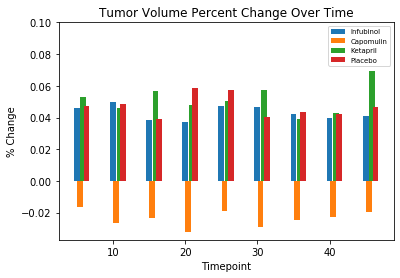

In [179]:
bar_w = 0.45

i_bar = plt.bar(i_change.index, i_change['Tumor Volume (mm3)'],label='Infubinol'),
c_bar = plt.bar(c_change.index+bar_w, c_change['Tumor Volume (mm3)'],label='Capomulin'), 
k_bar = plt.bar(k_change.index+bar_w*2, k_change['Tumor Volume (mm3)'],label='Ketapril'),
p_bar = plt.bar(p_change.index+bar_w*3, p_change['Tumor Volume (mm3)'],label='Placebo')
plt.ylabel('% Change')
plt.ylim(top=0.10)
plt.xlabel('Timepoint')
plt.title('Tumor Volume Percent Change Over Time')
plt.legend(loc='upper right',fontsize='x-small' )
plt.show()